### **Phase 1: Data Collection and Preparation**

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Task 1.1: Load the dataset from here.

In [2]:
# Task 1.1: Load the dataset
url = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv'


#### Task 1.2: Load the dataset into a Pandas DataFrame.

In [3]:
data = pd.read_csv(url)

# Create a copy of the dataset
df  = data.copy()

#### Task 1.3: Inspect the dataset for missing values and handle them appropriately.

In [4]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
df = df.drop(columns=['case_id'])

#### Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.

In [7]:
# Check the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [8]:
df.no_of_employees.value_counts().head(5)

183     18
854     16
724     16
766     15
1476    15
Name: no_of_employees, dtype: int64

In [9]:
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


### **Phase 2: Exploratory Data Analysis (EDA)**

#### Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable 

EDA of Numerical Features

In [10]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


EDA of Categorical Features

In [11]:
# Create a list of categorical features
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(df[col].value_counts())
    print('*'*40)
    print('*'*40)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
****************************************
****************************************
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
****************************************
****************************************
Y    14802
N    10678
Name: has_job_experience, dtype: int64
****************************************
****************************************
N    22525
Y     2955
Name: requires_job_training, dtype: int64
****************************************
****************************************
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
****************************************
****************************************
Year     22962
Hour      2157
Week      

#### Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

In [12]:
# Create a list of all numerical features
num_cols = df.select_dtypes(include='number').columns.tolist()

# Create a list of all categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()

#### **Visualization of Features Using Histogram and Boxplot**

In [13]:
def histogram_boxplot(df, column):
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)

        # Plot the histogram
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Plot the boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        
        plt.tight_layout()
        plt.show()

        skewness = df[column].skew()
        print(f'The skewness of {column} is {skewness:.2f}')

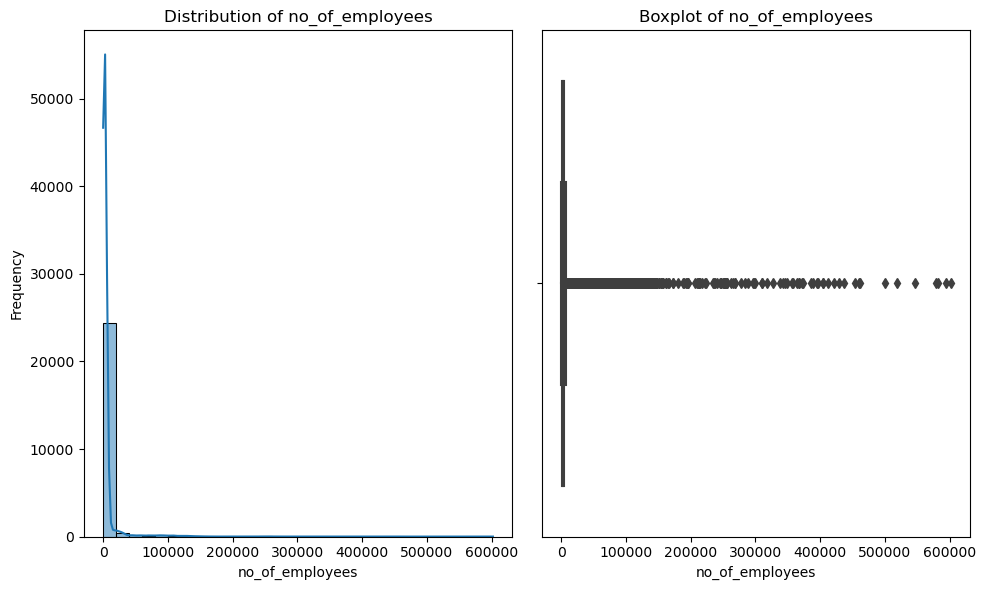

The skewness of no_of_employees is 12.27


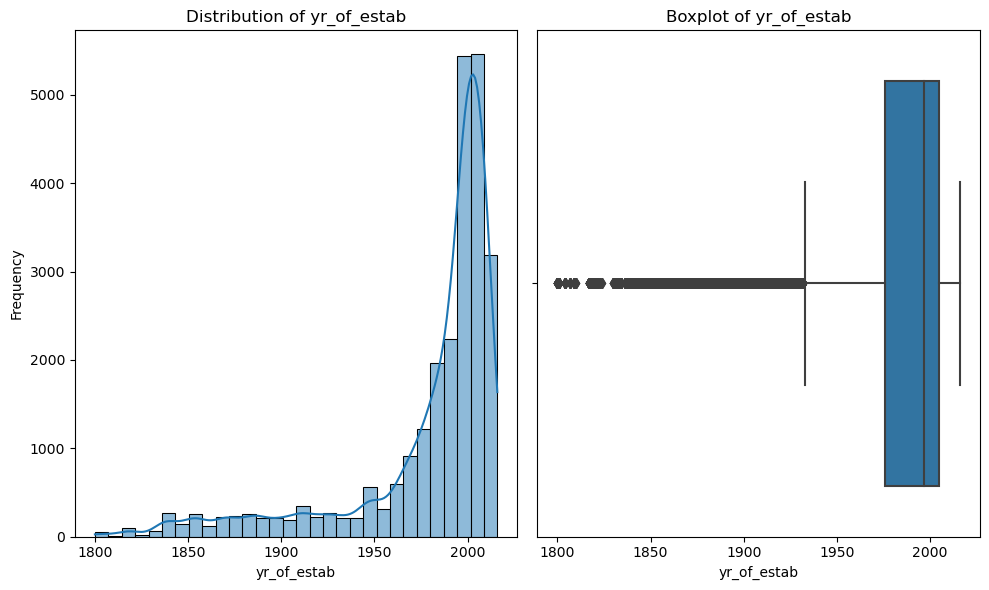

The skewness of yr_of_estab is -2.04


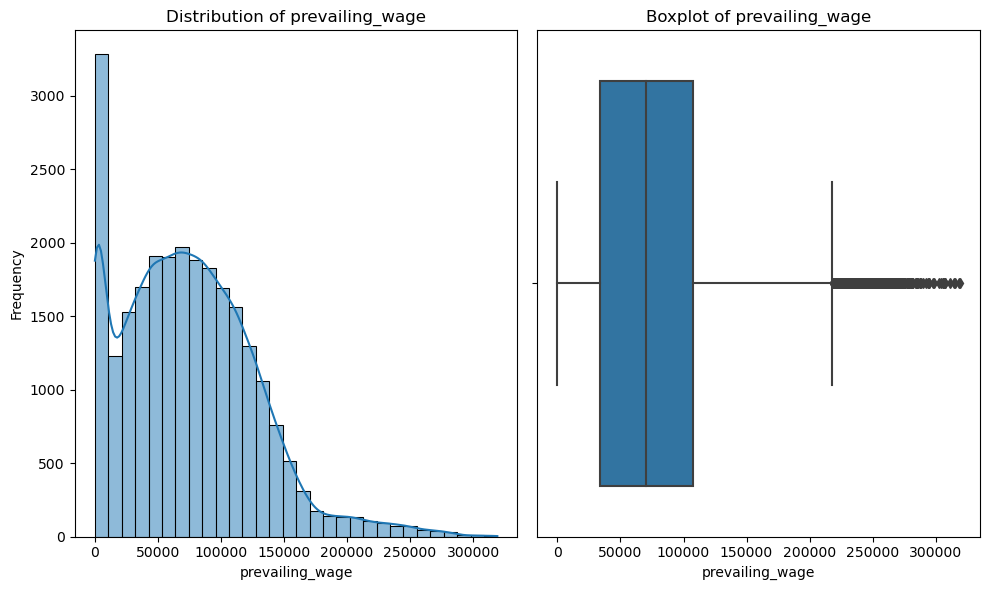

The skewness of prevailing_wage is 0.76


In [14]:
for column in num_cols:
    histogram_boxplot(df, column)



|Features|Outliers|Skewness|
|-----------|--------------|-------|
|No of Employees|Possibly Present| Highly skewed|
|Year_Of_Establishment|Present|Negatively left-skewed|
|Prevailing_Wage|Present|Present|Positively skewed|

#### **Visualization of Features and Target Using Countplot**

In [15]:
def categorical_data(df, cat_cols):
    plt.figure(figsize=(10, 6))
    for col in cat_cols:
        sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Countplot of {col}')
        plt.xlabel('Count') 
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    
    

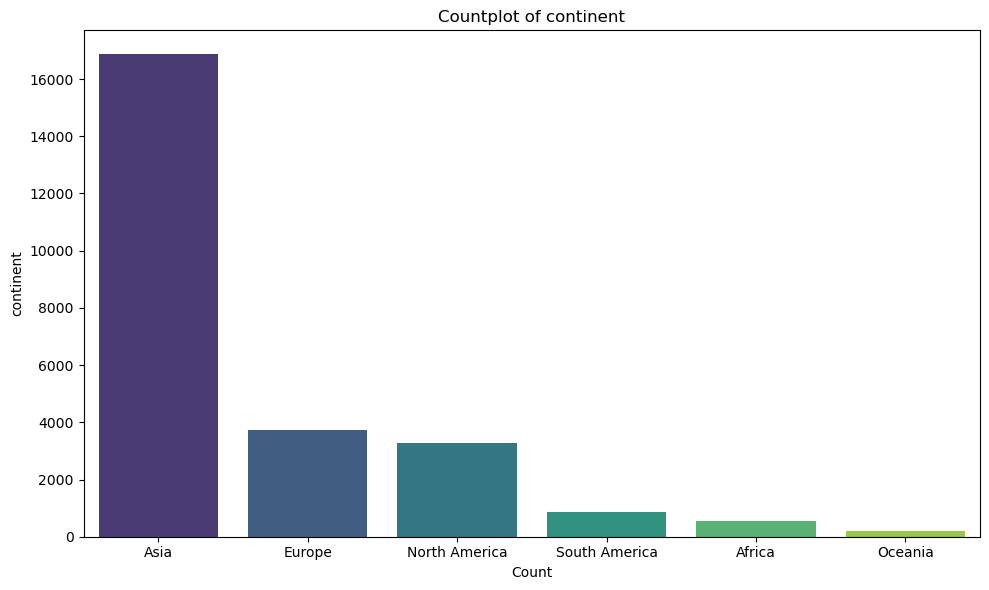

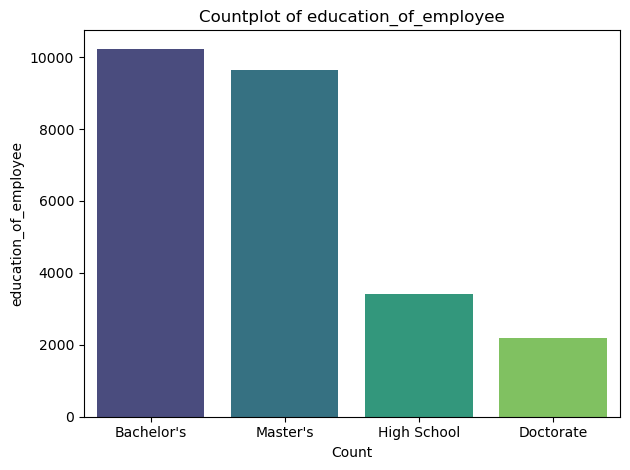

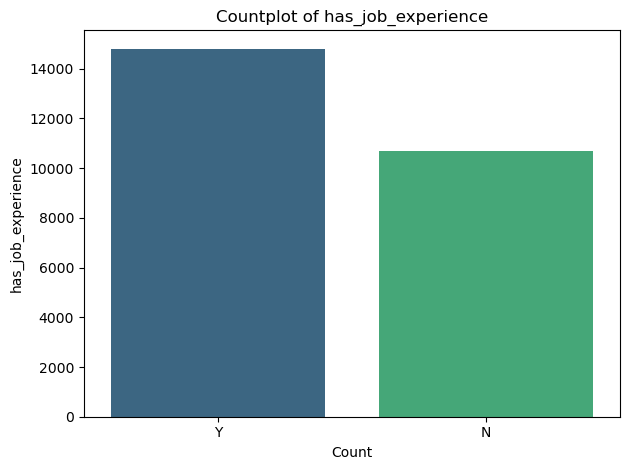

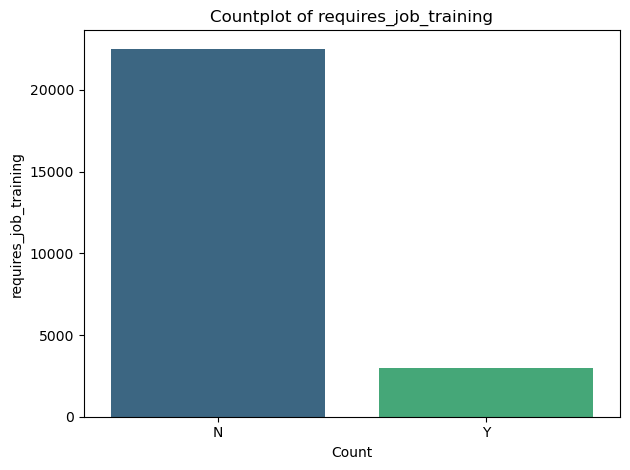

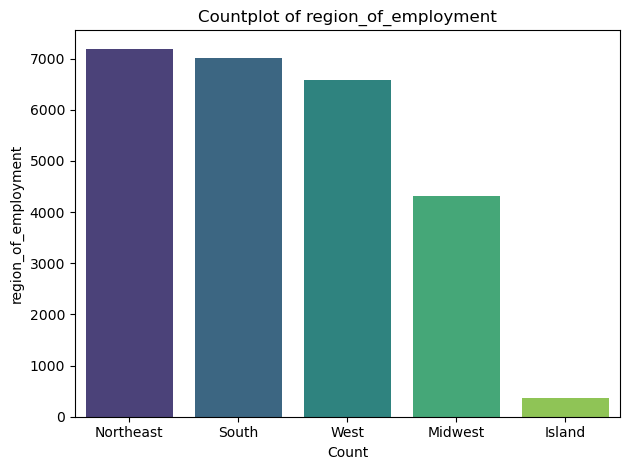

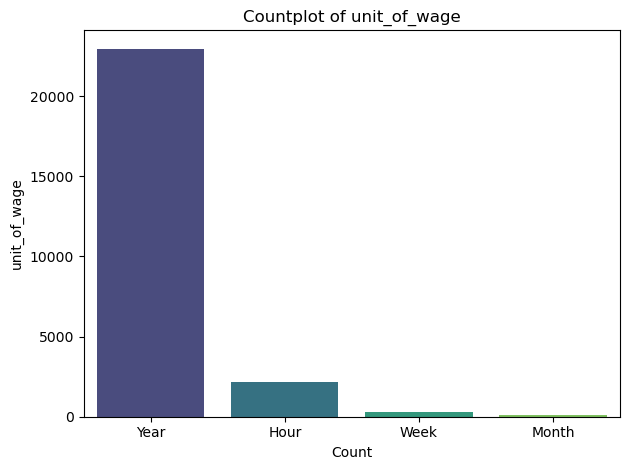

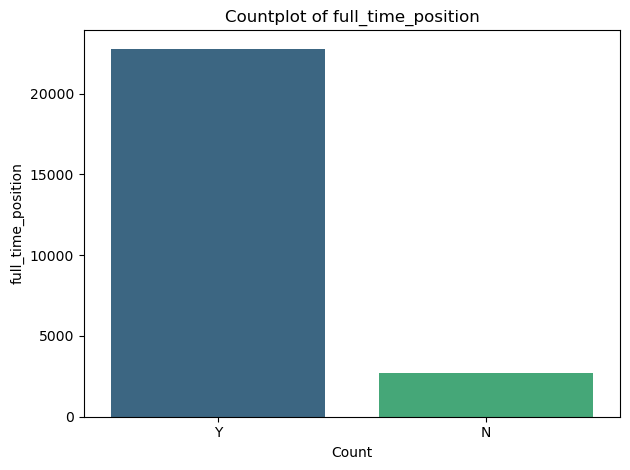

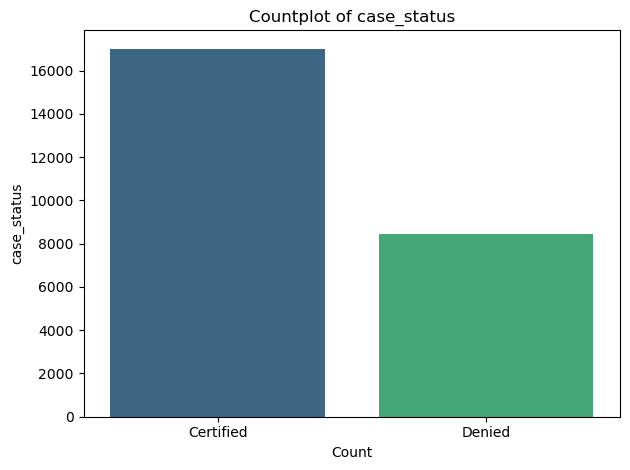

In [16]:
categorical_data(df, cat_cols)

In [17]:
def bivariate_scatterplot(df, x_col, y_col):
    # Calculate correlation coefficient
    from scipy.stats import pearsonr
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

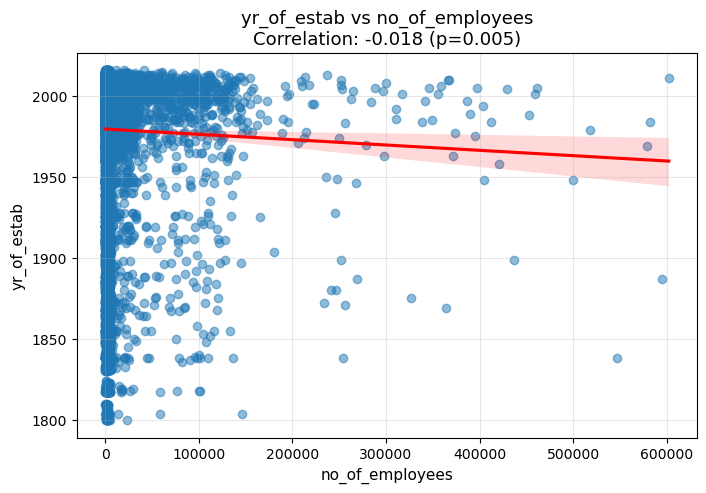

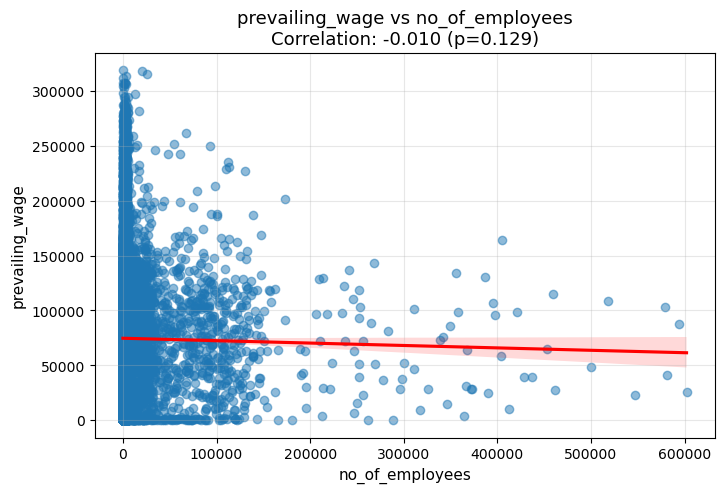

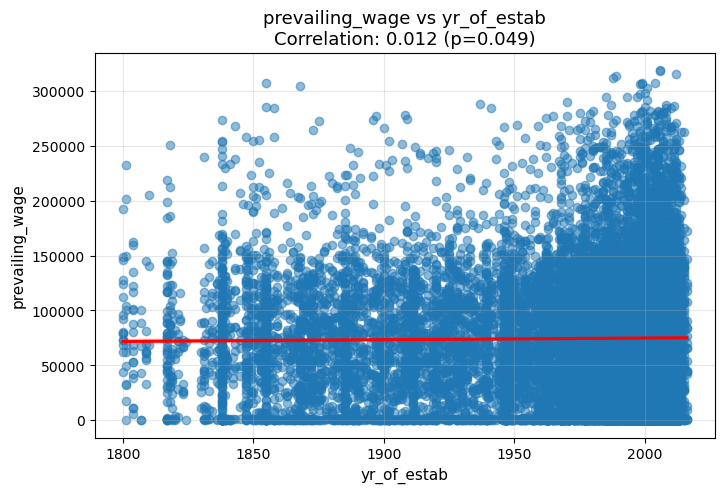

In [18]:
import itertools
for i, col1 in itertools.combinations(num_cols, 2):
    bivariate_scatterplot(df, i, col1)

In [19]:
def trivariate_scatterplot(df, x_col, y_col):
    # Calculate correlation coefficient
    from scipy.stats import pearsonr
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.lmplot(data=df, x=x_col, y=y_col, hue= 'case_status', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

<Figure size 800x500 with 0 Axes>

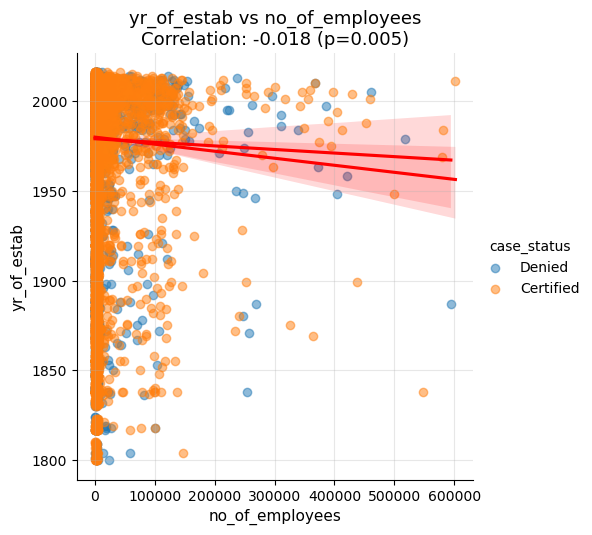

<Figure size 800x500 with 0 Axes>

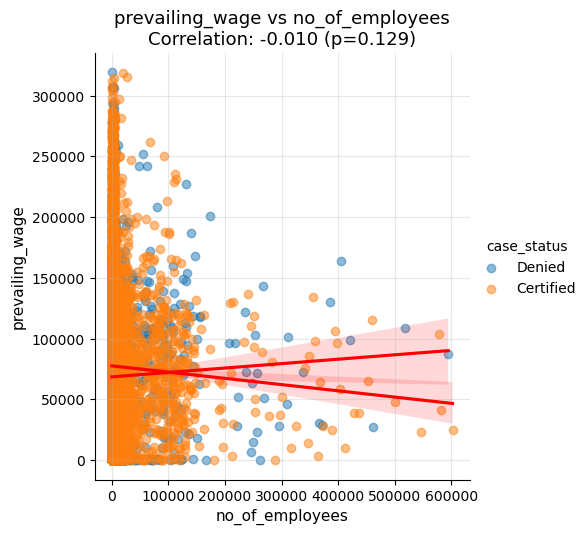

<Figure size 800x500 with 0 Axes>

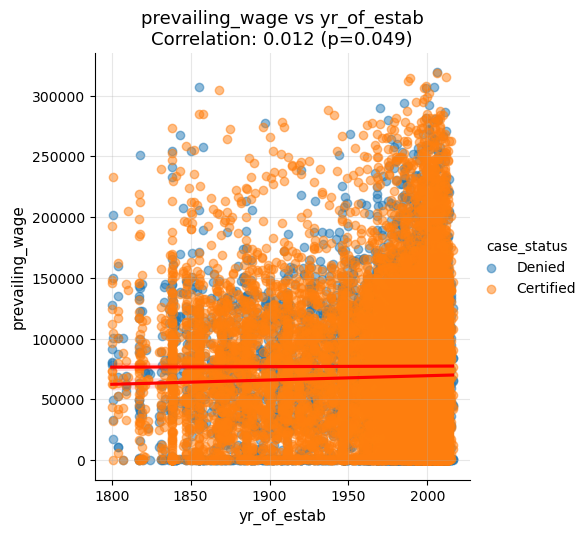

In [20]:
import itertools
for i, col1 in itertools.combinations(num_cols, 2):
    trivariate_scatterplot(df, i, col1)

#### Check the correlation of target with numerical data

In [ ]:
# Convert the target to binary. Create another copy of the dataset for this
df1 = df.copy()

df1['case_status'] = df1['case_status'].map({'Certified':1, 'Denied':0})
num_col = df1.select_dtypes(include='number')

In [27]:
df1['case_status'].dtype

dtype('int64')

In [28]:


def target_feature_correlation(data, target):
   
    correlation = num_col.corrwith(num_col[target]).drop(target)
    correlation_df = correlation.to_frame(name='corr').T


    plt.figure(figsize=(10, 2))
    sns.heatmap(correlation_df, annot=True, center=0, vmin=-1, vmax=1, fmt= '3f', cmap='Greens', cbar_kws= {'orientation':'vertical', 'shrink':0.7})
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target], rotation=0)
    print(correlation_df)
    plt.title(f'Correlation of numeric features with {target}')
    # return correlation.reindex(correlation.abs().sort_values(ascending=False)).index

      no_of_employees  yr_of_estab  prevailing_wage
corr         0.008677     0.008597         0.076198
None


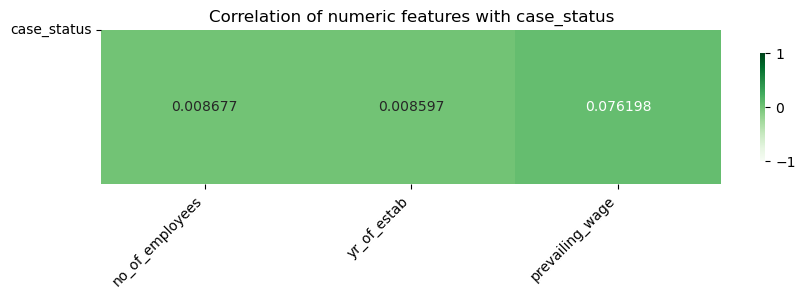

In [29]:
correlation_series = target_feature_correlation(data, 'case_status')
print(correlation_series)

In [24]:
data.corrwith

<bound method DataFrame.corrwith of          case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513      

#### Task 2.3: Identify and handle outliers in the dataset.

Already identified in task 2.2

### Export the data for preprocessing

In [ ]:

df.to_csv('easyvisa_cleaned.csv', index=False)